In [55]:
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

import subprocess

In [56]:
subprocess.run(['python', '../scripts/cluster.py'], check=True)

Skipping reldom2_s041: "['Order', 'Type'] not in index"


Warning message:
package ‘NbClust’ was built under R version 4.1.3 


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 2 as the best number of clusters 
* 3 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 
* 5 proposed 9 as the best number of clusters 
* 2 proposed 10 as the best numbe

CompletedProcess(args=['python', '../scripts/cluster.py'], returncode=0)

In [57]:
df = pd.read_csv('../data/clustered_data.csv')
participants = df['participant']
clusters = df['cluster']
df.drop(columns=['participant', 'cluster'], inplace=True)
df.head()


,FO_audwhat_RT,FO_audwhere_RT,FO_viswhat_RT,FO_viswhere_RT,SO_audwhat_RT,SO_audwhere_RT,SO_viswhat_RT,SO_viswhere_RT,FO_audwhat_accuracy,FO_audwhere_accuracy,FO_viswhat_accuracy,FO_viswhere_accuracy,SO_audwhat_accuracy,SO_audwhere_accuracy,SO_viswhat_accuracy,SO_viswhere_accuracy
0,1.015675,1.720722,1.296370,1.341634,0.808944,1.606454,1.251278,1.128000,1.00000,0.78125,1.00000,0.968750,1.0000,0.7500,0.8750,1.000
1,1.349290,1.356664,1.165648,1.058390,1.461668,1.584935,1.322362,1.095812,0.75000,0.81250,0.93750,0.935484,0.8750,0.6875,0.9375,0.875
2,1.077459,1.149573,0.877843,0.902444,1.103434,1.035821,0.832946,0.766390,0.93750,1.00000,1.00000,1.000000,0.7500,1.0000,1.0000,1.000
3,0.960171,1.142065,1.030101,0.832803,1.052119,1.008416,0.955326,0.707979,0.96875,1.00000,1.00000,0.968750,1.0000,1.0000,1.0000,1.000
4,1.505764,1.259297,1.154793,1.004116,1.255591,0.999182,0.895621,0.822283,0.81250,0.93750,0.96875,0.937500,0.9375,1.0000,0.9375,0.875


In [58]:
scaledDf = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
arrPCA = pca.fit_transform(scaledDf)

print(f"Explained variance: {pca.explained_variance_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance: [6.74755172 2.2052532 ]
Explained variance ratio: [0.40931839 0.13377455]


In [59]:
pcaDf = pd.DataFrame(arrPCA, columns=['PC1', 'PC2'])
pcaDf['participant'] = participants
pcaDf['cluster'] = clusters
pcaDf = pcaDf.set_index('participant')
pcaDf.head()

,PC1,PC2,cluster
participant,,,
reldom2_s001,2.077448,2.635486,0
reldom2_s002,3.690847,-1.810343,0
reldom2_s003,-2.038929,-1.023742,1
reldom2_s004,-2.596696,0.310076,1
reldom2_s005,0.392776,-1.178111,1


/var/folders/kc/1tvt60ts6xj710lg4sdb4khr0000gn/T/ipykernel_59274/905275159.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  polygon = Polygon(hull_points, closed=True, fill=True, alpha=0.2, color=color, edgecolor='black', linewidth=1.5)
/var/folders/kc/1tvt60ts6xj710lg4sdb4khr0000gn/T/ipykernel_59274/905275159.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  polygon = Polygon(hull_points, closed=True, fill=True, alpha=0.2, color=color, edgecolor='black', linewidth=1.5)


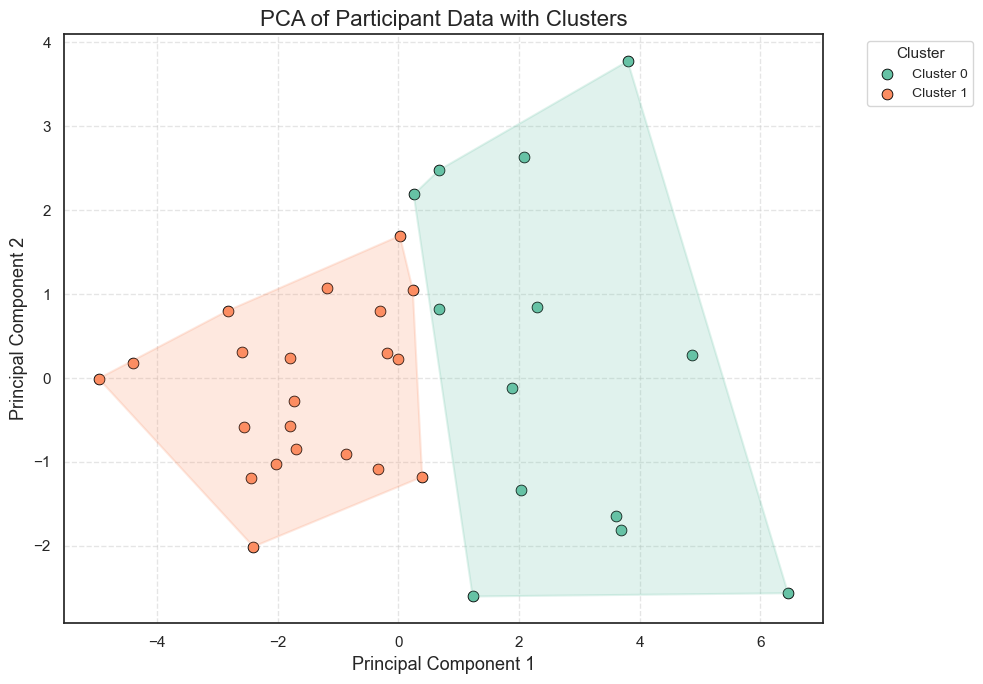

In [60]:
sns.set_theme(style="white", context="notebook")

# Choose a soft color palette
palette = sns.color_palette("Set2")
cluster_ids = sorted(pcaDf['cluster'].unique())
color_map = {cluster_id: palette[i % len(palette)] for i, cluster_id in enumerate(cluster_ids)}

# Create the plot
plt.figure(figsize=(10, 7))
ax = plt.gca()

# Plot each cluster with convex hull
for cluster_id in cluster_ids:
    subset = pcaDf[pcaDf['cluster'] == cluster_id]
    points = subset[['PC1', 'PC2']].values
    color = color_map[cluster_id]

    # Scatter points (smaller size)
    sns.scatterplot(data=subset, x='PC1', y='PC2', color=color, s=60, edgecolor='black', ax=ax, label=f"Cluster {cluster_id}")

    # Draw filled convex hull if enough points
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]
        polygon = Polygon(hull_points, closed=True, fill=True, alpha=0.2, color=color, edgecolor='black', linewidth=1.5)
        ax.add_patch(polygon)

# Labeling and styling
plt.title("PCA of Participant Data with Clusters", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=13)
plt.ylabel("Principal Component 2", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Cluster", fontsize=10, title_fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()